<a href="https://colab.research.google.com/github/monu322/CE888/blob/main/LAB3/L3_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder



In [69]:
df0 = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")

print('Original number of columns: ',len(df0.columns))

df0[["education"]] = df0[["education"]].apply(LabelEncoder().fit_transform)
df0[["month"]] = df0[["month"]].apply(LabelEncoder().fit_transform)
df0[["day_of_week"]] = df0[["day_of_week"]].apply(LabelEncoder().fit_transform)
df0[["poutcome"]] = df0[["poutcome"]].apply(LabelEncoder().fit_transform)

df0[["y"]] = df0[["y"]].apply(LabelEncoder().fit_transform)

cat_features = ["job", "marital", "default", "housing", "loan", "contact"]
df0 = pd.get_dummies(df0, columns=cat_features)

df0 = df0.drop(['duration'], axis = 1)

df0['pdays'].replace(999, 0, inplace=True)

print('before dropna',df0.shape)

df0 = df0.dropna()

print('after dropna',df0.shape)

df0.head()



Original number of columns:  21
before dropna (41188, 41)
after dropna (41188, 41)


,age,education,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,0,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,57,3,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
2,37,3,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3,40,1,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
4,56,3,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1


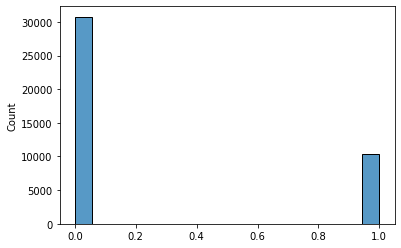

In [66]:
#for displaying the imbalance in the data  
y = df0.values.T[14]

sns_plot = sns.histplot(y, kde=False)



In [67]:
total = df0.shape[0]

label_y = df0[df0["y"] == 1]

imbalance = (label_y.shape[0]/total)*100

print('Imbalance: '+str(round(imbalance,2))+'%')

Imbalance: 11.27%


In [79]:
df = df0

y = df[["y"]].values.T[0]
X = df.drop(['y'], axis=1)

features = X.columns.values

print(features)

X = df.drop(['y'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print('Training data imbalance %: ', round(np.count_nonzero(y_train == 0)/len(y_train), 3)*100)
print('Test data imbalance %: ', round(np.count_nonzero(y_test == 0)/len(y_test), 3)*100)


['age' 'education' 'month' 'day_of_week' 'campaign' 'pdays' 'previous'
 'poutcome' 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m'
 'nr.employed' 'job_admin.' 'job_blue-collar' 'job_entrepreneur'
 'job_housemaid' 'job_management' 'job_retired' 'job_self-employed'
 'job_services' 'job_student' 'job_technician' 'job_unemployed'
 'job_unknown' 'marital_divorced' 'marital_married' 'marital_single'
 'marital_unknown' 'default_no' 'default_unknown' 'default_yes'
 'housing_no' 'housing_unknown' 'housing_yes' 'loan_no' 'loan_unknown'
 'loan_yes' 'contact_cellular' 'contact_telephone']
Training data imbalance %:  88.8
Test data imbalance %:  88.5


In [44]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [72]:
clf = RandomForestClassifier(n_estimators=250, max_depth=6)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')  # cross-validation
print('RF classifier score: \n', scores.mean())

RF classifier score: 
 0.2916884453375036


In [62]:
dummy_clf = DummyClassifier(strategy='stratified')
scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring='f1')  # cross-validation
print('Dummy classifier score: \n', scores.mean())

Dummy classifier score: 
 0.1064999215158858


In [ ]:
parameters = {'n_estimators':[100,500,1000], 'max_depth':[4,6,8]}

from sklearn.model_selection import GridSearchCV

grid_RFC = GridSearchCV(estimator=clf, param_grid = parameters, cv = 10, n_jobs=-1)
grid_RFC.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RFC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RFC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RFC.best_params_)

In [82]:
clf = RandomForestClassifier(n_estimators=400, max_depth=8, random_state=60)
#scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')  # cross-validation
#print(scores.mean())

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7288
           1       0.65      0.22      0.33       950

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.64      8238
weighted avg       0.88      0.90      0.87      8238

Feature ranking:
1. nr.employed (0.199460)
2. euribor3m (0.179169)
3. pdays (0.122746)
4. poutcome (0.092204)
5. emp.var.rate (0.069484)
6. cons.conf.idx (0.067760)
7. cons.price.idx (0.052594)
8. month (0.037289)
9. age (0.034636)
10. previous (0.025059)
11. day_of_week (0.014329)
12. campaign (0.012613)
13. contact_cellular (0.012172)
14. contact_telephone (0.012024)
15. education (0.011688)
16. job_student (0.004407)
17. default_no (0.004017)
18. default_unknown (0.003889)
19. job_retired (0.003747)
20. marital_single (0.003707)
21. housing_yes (0.003174)
22. job_blue-collar (0.003127)
23. housing_no (0.002904)
24. marital_married (0.002803)
25. job_admin. (0.00

(0.0, 0.4362911806034018)

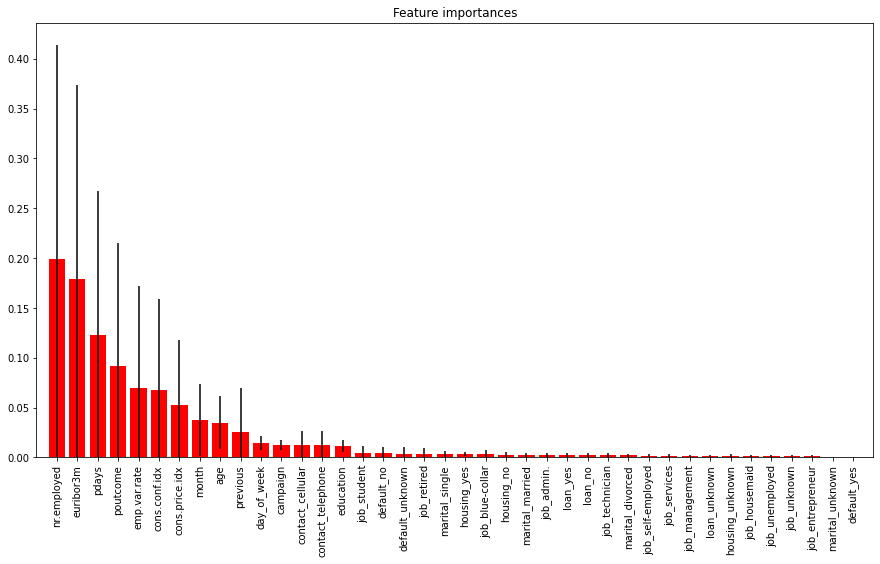

In [83]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

importances = clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0, None])


In [56]:
scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')  # cross-validation
print(scores.mean())

0.8931776356922934
